Task 1:
Goal: Understand the "shape" and characteristics of individual variables.
Scenario: You have a dataset of housing prices. You need to know if the prices are normally distributed or skewed.
Instructions:
Pick one numerical column (e.g., Price) and plot a Histogram with a KDE (Kernel Density Estimate) line.
Calculate the Skewness and Kurtosis of that column.
Pick one categorical column (e.g., City) and create a Count Plot to see which category is most frequent.
Why: Identifying skewed data tells you if you need to apply transformations (like Log Scaling) before feeding data into an ML model.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:\Users\archana\OneDrive\Desktop\housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


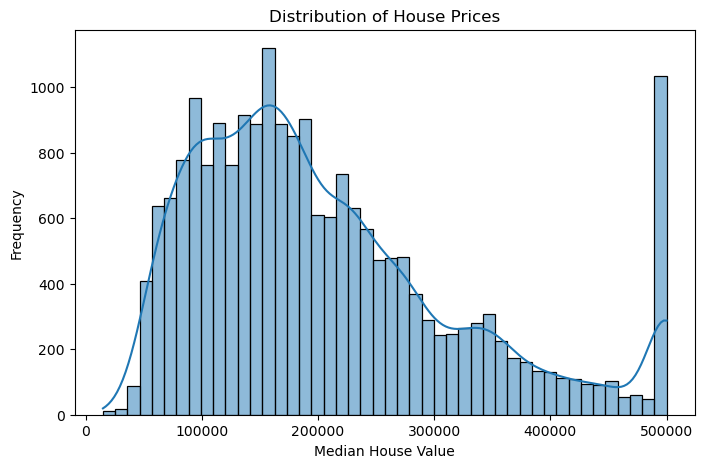

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data['median_house_value'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()



In [13]:
skewness = data['median_house_value'].skew()
kurtosis = data['median_house_value'].kurt()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.9777632739098341
Kurtosis: 0.3278702429465872


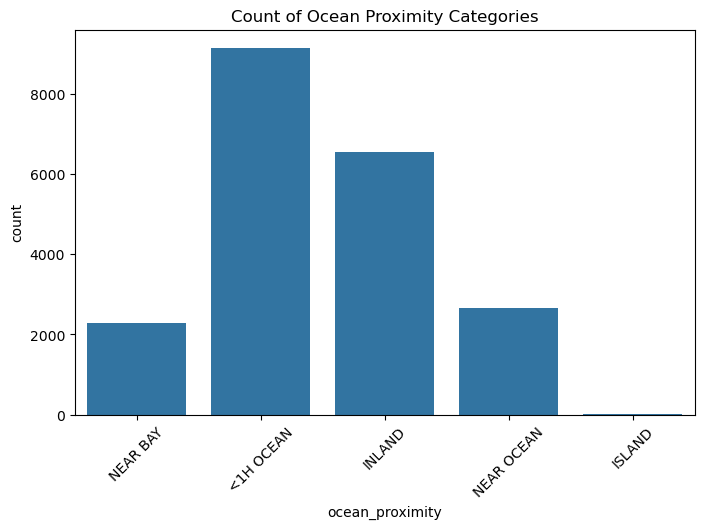

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='ocean_proximity', data=data)
plt.title("Count of Ocean Proximity Categories")
plt.xticks(rotation=45)
plt.show()

If price is highly skewed → apply log transformation before ML
If kurtosis is high → many extreme values
If categorical data is imbalanced → may affect model performance

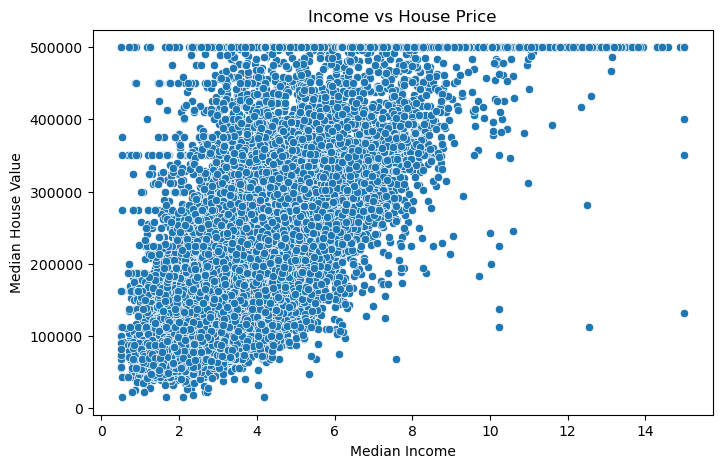

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title("Income vs House Price")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

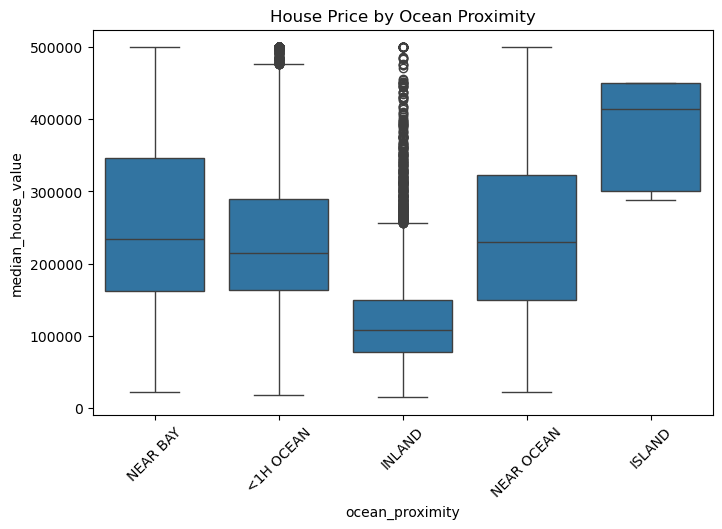

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.xticks(rotation=45)
plt.title("House Price by Ocean Proximity")
plt.show()

After plotting, you might write:

As median income increases, median house value also increases, indicating a strong positive relationship.

Or:

Houses located near the ocean tend to have higher median prices compared to inland houses.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
corr_matrix = data.corr(numeric_only=True)
print(corr_matrix)


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

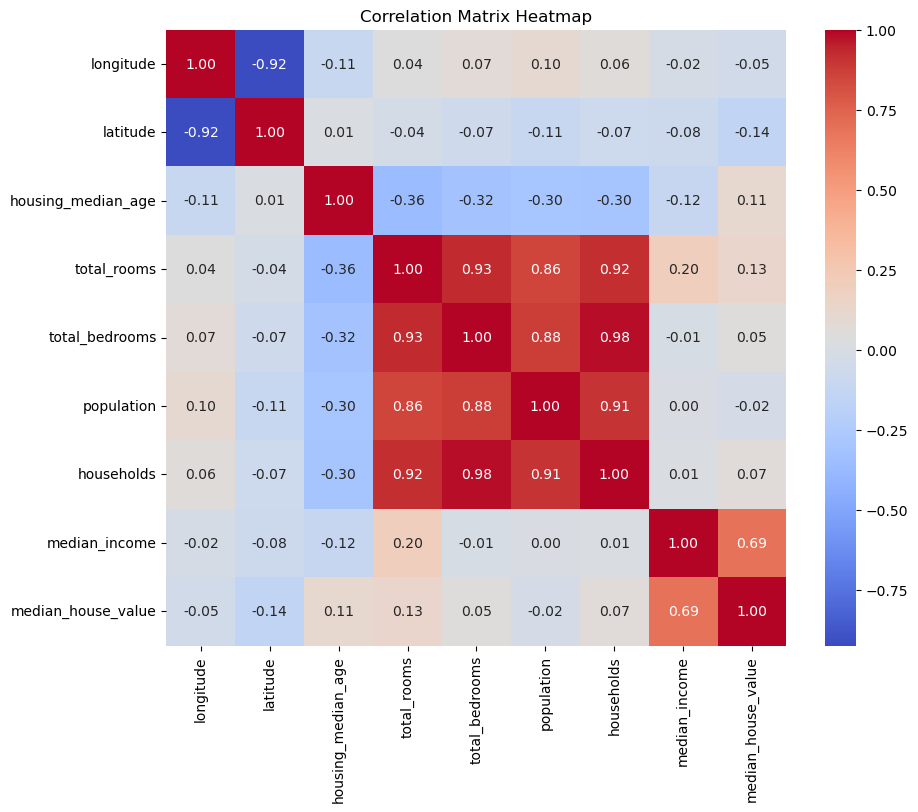

In [20]:

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [21]:
import numpy as np
high_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)]
print(high_corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude                 NaN       NaN                 NaN          NaN   
latitude                  NaN       NaN                 NaN          NaN   
housing_median_age        NaN       NaN                 NaN          NaN   
total_rooms               NaN       NaN                 NaN          NaN   
total_bedrooms            NaN       NaN                 NaN     0.930380   
population                NaN       NaN                 NaN     0.857126   
households                NaN       NaN                 NaN     0.918484   
median_income             NaN       NaN                 NaN          NaN   
median_house_value        NaN       NaN                 NaN          NaN   

                    total_bedrooms  population  households  median_income  \
longitude                      NaN         NaN         NaN            NaN   
latitude                       NaN         NaN         NaN            NaN   
housing_

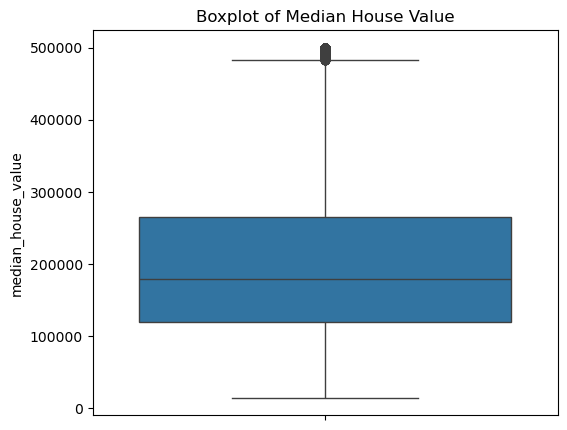

In [22]:
plt.figure(figsize=(6,5))
sns.boxplot(y=data['median_house_value'])
plt.title("Boxplot of Median House Value")
plt.show()